In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from torch.nn import functional as F

In [2]:
x = torch.arange(100)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [3]:
freq = np.linspace(0, 40, 512)
x = np.linspace(0, 8*np.pi, 100)

y_val = torch.from_numpy(np.sin(x[None, :]*freq[:, None]))

z = torch.randn(512, 40)  # zdim=40
y_val.shape

torch.Size([512, 100])

In [10]:
intervals = 25
similarity_threshold = 1
contrastive_scale = 1
contrastive_dims = [0, 25]

y_val = y_val.reshape(y_val.shape[0], intervals, -1)  # [batch_size, intervals, interval_size]

values_dist = torch.mean((y_val.unsqueeze(1) - y_val.unsqueeze(0))**2, dim=-1)
similarity_mask = values_dist < similarity_threshold

y_val.shape, values_dist.shape, similarity_mask.shape

(torch.Size([512, 25, 4]),
 torch.Size([512, 512, 25]),
 torch.Size([512, 512, 25]))

In [16]:
u = z[:, contrastive_dims[0]:contrastive_dims[1]]
u_dist = u.unsqueeze(1) - u.unsqueeze(0)  # [batch_size, batch_size, udim]. Each distance only along one dimension so L2 reduces to scalar difference

loss_contrastive_intervals = torch.mean(similarity_mask * u_dist**2 + (~similarity_mask) * (torch.clamp(contrastive_scale - u_dist, min=0))**2, dim=(0, 1))
loss_contrastive = torch.mean(loss_contrastive_intervals)

u_dist_L2 = torch.norm(u_dist, p=2, dim=-1)

u_dist.shape, u_dist_L2.shape, loss_contrastive

(torch.Size([512, 512, 25]), torch.Size([512, 512]), tensor(2.3601))

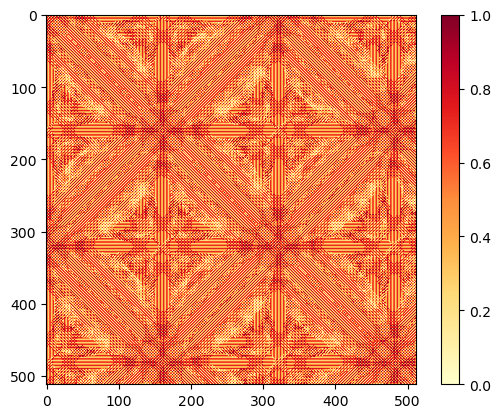

In [83]:
plt.imshow(similarity_mask[:, :, 20].numpy(), cmap='YlOrRd')
plt.colorbar()